## First Function
## Backtracking With Default Method as SD

In [1]:

# Import numerical python and pyplot# Impor 
import numpy as np # Namespace is np
import matplotlib.pyplot as plt # Namespace is plt

#function for backtracking
def backtracking1D(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for 1D functions with illustrations
    :param x0: Previous point from backtracking $x^{(k)}$, or initial guess $x^{(0)}$
    :param dx: Incremental factor for updating x0; $\Delta x$
    :param f: Objective function
    :param df0: Derivative of f at x0 or $f^\prime(x^{(0)})$
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots to illustrate
    :return: x1, the next iterate in backtracking, or $x^{(k+1)}$
    '''
    
    print('In backtracking...')
    
    if verbose:
        n=0
        xs = [x0 + dx] * 3
    
    ######################################
    # The core of the algorithm
    ######################################
    delta = alpha * dx * df0 # Just precomputing the alpha times increment times derivative factor
    t = 1 # Initialize t=beta**0; beta**n in the loop
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}, $x = x^{(0)}+\beta^0\Delta x$
    fx = f(x)
    print(fx)
    while (not np.isfinite(fx)) or fx > f0 + delta * t:
        print(fx)
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - x0)
        l = 0.1 * np.abs(xs[0] - x0)
        if dx < 0:
            s = np.linspace(x0 - u, x0 + l, 100)
            xi = [x0-u, x0]
            fxi = [f(x0) - alpha*u*df0, f(x0)]
        else:
            s = np.linspace(x0 - l, x0 + u, 100)
            xi = [x0, x0 + u]
            fxi = [f(x0), f(x0) + alpha*u*df0]
            
        y = np.zeros(len(s))
        for i in range(len(s)):
            y[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([x0, x0], [0, f(x0)], color='black', label='Initial point')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
    
    return x


## Second Function
## Accelarated Backtracking with default method as SD

In [2]:
#function for accelarated tracking
def accelerated_backtracking1D(k, tk, x0, x1, dx, f, df, beta=0.8, verbose=False):
    '''
    Accelerated backtracking for 1D functions with illustrations
    :param k: Index of the current accelerated backtracking iteration; k=1 for the first
    :param tk: The t from the previous accelerated backtracking iteration; tk=1 for the first
    :param x0: Next most recent point from accelerated backtracking
    :param x1: Most recent point from accelerated backtracking; x1=x0 for the first iteration
    :param dx: Incremental factor for updating x1
    :param f: Objective function
    :param df: Derivative function of f
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots to illustrate
    :return: x, t the next iterate and initial t in accelerated backtracking
    '''
    
    y = x1 + (k-1)*(x1 - x0)/(k+2) # Base point for accelerated backtracking
    
    if verbose:
        n=0
        xs = [y + tk*dx] * 3
    
    t = tk # Initialize t from the last iteration; t_0=1
    x = y + t*dx
    fx = f(x)
    fy = f(y)
    dfy = df(y)
    delta = dfy * dx

    
    while (not np.isfinite(fx)) or fy + delta*t + t*dx**2/2 < fx:
        t = beta * t
        x = y + t*dx
        fx = f(x)
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - y)
        l = 0.1 * np.abs(xs[0] - y)
        if dx < 0:
            s = np.linspace(y - u, y + l, 100)
            xi = np.linspace(y-u, y, 100)
        else:
            s = np.linspace(y - l, y + u, 100)
            xi = np.linspace(y, y + u, 100)
        dxi = xi-y
        fxi = fy + dfy*dxi + dxi*dx/2
            
        z = np.zeros(len(s))
        for i in range(len(s)):
            z[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Accelerated Backtracking illustration')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        arm, =plt.plot(xi, fxi, '--', label='Stopping Criterion')
        fcn, =plt.plot(s, z, label='Objective Function')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([y], [fy], label='Initial point', color='black')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.show()
    
    return x, t

### Optional 
### Illustrating the slow rate of convergence for backtracking

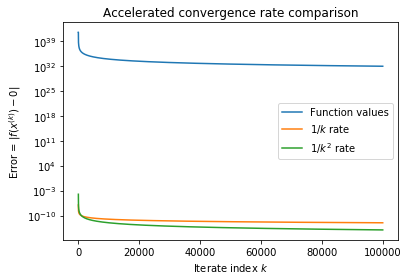

In [3]:
from math import exp,log
import numpy as np
import math

fun = lambda x: exp(x)/x
dfun = lambda x: exp(x)*(x-1)/x**2

x = 100 # initial guess

iterations = 100000
alpha = 0.4
beta = 0.8

iterates = np.zeros(iterations)
iterate_values = np.zeros(iterations)

iterates[0] = x
iterates[1] = x
iterate_values[0] = fun(x)
iterate_values[1] = fun(x)

t = 1

for i in range(2, iterations):
    x, t = accelerated_backtracking1D(i+1, t, iterates[i-2], iterates[i-1], -dfun(iterates[i-1]), fun, dfun, beta=beta)
    iterates[i] = x
    iterate_values[i] = fun(x)
    
idx = np.array(list(range(iterations)))+1
p1, = plt.semilogy(iterate_values, label='Function values')
p2, = plt.semilogy(0.0000001/idx, label = '$1/k$ rate')
p3, = plt.semilogy(0.0001/(idx**2), label = '$1/k^2$ rate')
plt.title('Accelerated convergence rate comparison')
plt.legend(handles=[p1, p2, p3])
plt.ylabel('Error = $| f(x^{(k)}) - 0 |$')
plt.xlabel('Iterate index $k$')
plt.show()

# The following is the main function where we test 
## Backtracking+Steepest Decent
## Backtracking+Newton's Method
## AcceleratedBacktracking+Steepest Decent
## AcceleratedBacktracking+Newton's Method

In [13]:
'''
The following are three functions and their first and second derivative function
'''
'''
f = lambda x: np.exp(x)/x # NOTE: exp(1000) would cause overflow error (math out of range) since the largest float python exp function can deal with is 700
df = lambda x: np.exp(x)*(x-1)/x**2
d2f = lambda x: np.exp(x)*(x**2-2*x+2)/x**3
'''

f=lambda x: np.log(x**2+1)+np.log((x-1)**2+1)+np.log((x-3/2)**2+1)
df =lambda x: 2*x/(x**2+1)+2*(x-1)/((x-1)**2+1)+2*(x-3/2)/((x-3/2)**2+1)
d2f = lambda x: 2*(1/(x**2+1)-2*x**2/(x**2+1)**2-2*(x-3/2)**2/((x-3/2)**2+1)**2-2*(x-1)**2/((x-1)**2+1)**2+1/((x-3/2)**2+1)+1/((x-1)**2+1))

'''
f=lambda x: -1/(x**2+1)-1/((x-1)**2+1)-1/((x-3/2)**2+1)
df = lambda x: 2*(x/(x**2+1)**2+(x-3/2)/((x-3/2)**2+1)**2+(x-1)/((x-1)**2+1)**2)
d2f=lambda x: 2*(1/(1+x**2)**2-4*x**2/(1+x**2)**3-4*(x-3/2)**2/((x-3/2)**2+1)**3+1/((x-3/2)**2+1)**2+1/(1+(-1+x)**2)**2-4*(x-1)**2/(1+(x-1)**2)**3)
'''
iter = 50 # 50 iterations of each
#enter X^(0) as either 10, 100 or 1000
initial = input("enter x^(0) as either 10,100,1000")
x0 = int(initial)

enter x^(0) as either 10,100,100010


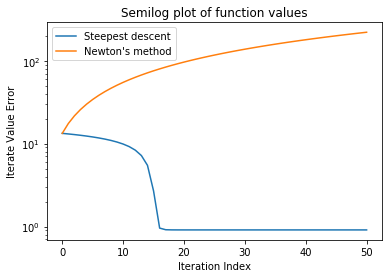

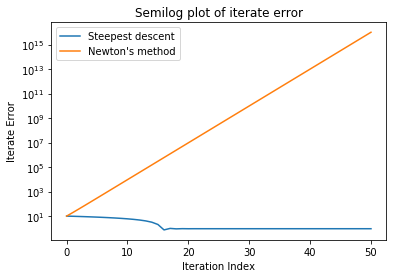

In backtracking...
12.878284481355884
In backtracking...
12.369933276389649
In backtracking...
11.764066875477278
In backtracking...
11.01616462102187
In backtracking...
10.043609655018164
In backtracking...
8.667564853869457
In backtracking...
6.391466739063068
In backtracking...
1.6933158230166394
In backtracking...
2.8762566905094737
2.8762566905094737
1.9234771777543513
1.3644465817356084
In backtracking...
1.2802457826069125
1.2802457826069125
1.0676008285134364
In backtracking...
1.0881854171168173
1.0881854171168173
1.0000545054809609
0.9496083541695496
In backtracking...
0.9524133315424053
0.9524133315424053
0.929229187524373
0.9171570910647256
In backtracking...
0.9165493426268223
0.9165493426268223
0.9128665545985253
0.9108667581718621
In backtracking...
0.9109103577936403
0.9109103577936403
0.9101314413820611
0.9097163687730934
In backtracking...
0.9097146354549386
0.9097146354549386
0.9095666629138841
0.9094871548309051
In backtracking...
0.9094878180404389
0.90948781804043

14.723803940798017
14.467246575994496
14.253842628192292
14.077513761633117
13.932646023446146
13.814196493767366
13.717735642258745
13.63944262493741
13.57606962340551
13.524888441597337
13.483629203712608
13.450417882628738
13.423716858142345
13.402270824704349
13.385059070083791
13.371254310416067
13.360187770564059
13.351319936395234
13.344216295948605
13.338527370587773
13.333972374676996
13.330325906603143
13.32740714856068
13.325071127647446
13.32320166114469
13.32170567182924
13.32050861393165
13.319550797020625
13.318784434277472
13.318171274167927
13.317680701325537
13.317288214403902
13.316974206529654
13.316722988493385
13.316522006552146
13.316361216191009
13.31623258082472
13.31612967056208
13.31604734109138
13.31598147670802
13.315928784684967
13.315886630736047
13.3158529073654
13.315825928533513
13.315804345381371
13.31578707880421
13.315773265506994
13.315762214846508
13.315753374303586
13.315746301859946
13.31574064389908
13.315736117526576
13.315732496426133
13.3157

13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
In backtracking...
17.50500388050027
17.50500388050027
16.868896572381217
16.306638889309916
15.81564614754041
15.391812995407324
15.029871633169604
14.723803940798017
14.467246575994496
14.253842628192292
14.077513761633117
13.932646023446146
13.814196493767366
13.717735642258745
13.63944262493741
13.57606962340551
13.524888441597337
13.483629203712608
13.450417882628738
13.423716858142345
13.402270824704349
13.385059070083791
13.371254310416067
13.360187770564059
13.351319936395234
13.344216295948605
13.338527370587773
13.333972374676996
13.330325906603143
13.32740714856068
13.325071127647446
13.32320166114469
13.32170567182924
13.32050861393165
13.319550797020625
13.318784434277472
13.318171274167927
13.317680701325537
13.317288214403902
13.316974206529654
13.316722988493385
13.316522006552146
13.316361216191009
13.31623258082472
13.31612967056208
13.31604734109138
13.31598147670802
13.315928784684967
13.315

13.315718012002698
13.315718012002698
13.315718012002696
13.315718012002694
13.315718012002694
13.315718012002694
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
In backtracking...
17.50500388050027
17.50500388050027
16.868896572381217
16.306638889309916
15.81564614754041
15.391812995407324
15.029871633169604
14.723803940798017
14.467246575994496
14.253842628192292
14.077513761633117
13.932646023446146
13.814196493767366
13.717735642258745
13.63944262493741
13.57606962340551
13.524888441597337
13.483629203712608
13.450417882628738
13.423716858142345
13.402270824704349
13.385059070083791
13.371254310416067
13.360187770564059
13.351319936395234
13.344216295948605
13.338527370587773
13.333972374676996
13.330325906603143
13.32740714856068
13.325071127647446
13.32320166114469
13.32170567182924
13.32050861393165
13.319550797020625
13.318784434277472
13.318171274167927
13.317680701325537
13.317288214403902
13

13.315718012002714
13.315718012002709
13.315718012002705
13.315718012002703
13.315718012002698
13.315718012002698
13.315718012002696
13.315718012002694
13.315718012002694
13.315718012002694
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
In backtracking...
17.50500388050027
17.50500388050027
16.868896572381217
16.306638889309916
15.81564614754041
15.391812995407324
15.029871633169604
14.723803940798017
14.467246575994496
14.253842628192292
14.077513761633117
13.932646023446146
13.814196493767366
13.717735642258745
13.63944262493741
13.57606962340551
13.524888441597337
13.483629203712608
13.450417882628738
13.423716858142345
13.402270824704349
13.385059070083791
13.371254310416067
13.360187770564059
13.351319936395234
13.344216295948605
13.338527370587773
13.333972374676996
13.330325906603143
13.32740714856068
13.325071127647446
13.32320166114469
13.32170567182924
13.32050861393165
13.319550797020625
13

13.315718012002854
13.31571801200282
13.315718012002794
13.315718012002776
13.315718012002758
13.315718012002744
13.315718012002733
13.315718012002726
13.31571801200272
13.315718012002714
13.315718012002709
13.315718012002705
13.315718012002703
13.315718012002698
13.315718012002698
13.315718012002696
13.315718012002694
13.315718012002694
13.315718012002694
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
In backtracking...
17.50500388050027
17.50500388050027
16.868896572381217
16.306638889309916
15.81564614754041
15.391812995407324
15.029871633169604
14.723803940798017
14.467246575994496
14.253842628192292
14.077513761633117
13.932646023446146
13.814196493767366
13.717735642258745
13.63944262493741
13.57606962340551
13.524888441597337
13.483629203712608
13.450417882628738
13.423716858142345
13.402270824704349
13.385059070083791
13.371254310416067
13.360187770564059
13.351319936395234
13.344216295948605


13.315718012005075
13.315718012004595
13.315718012004218
13.315718012003911
13.315718012003666
13.315718012003472
13.315718012003314
13.31571801200319
13.31571801200309
13.31571801200301
13.315718012002947
13.315718012002893
13.315718012002854
13.31571801200282
13.315718012002794
13.315718012002776
13.315718012002758
13.315718012002744
13.315718012002733
13.315718012002726
13.31571801200272
13.315718012002714
13.315718012002709
13.315718012002705
13.315718012002703
13.315718012002698
13.315718012002698
13.315718012002696
13.315718012002694
13.315718012002694
13.315718012002694
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
In backtracking...
17.50500388050027
17.50500388050027
16.868896572381217
16.306638889309916
15.81564614754041
15.391812995407324
15.029871633169604
14.723803940798017
14.467246575994496
14.253842628192292
14.077513761633117
13.932646023446146
13.814196493767366
13.717735642258745
1

13.315718012020447
13.315718012016898
13.315718012014056
13.315718012011782
13.315718012009963
13.315718012008508
13.315718012007347
13.315718012006414
13.315718012005672
13.315718012005075
13.315718012004595
13.315718012004218
13.315718012003911
13.315718012003666
13.315718012003472
13.315718012003314
13.31571801200319
13.31571801200309
13.31571801200301
13.315718012002947
13.315718012002893
13.315718012002854
13.31571801200282
13.315718012002794
13.315718012002776
13.315718012002758
13.315718012002744
13.315718012002733
13.315718012002726
13.31571801200272
13.315718012002714
13.315718012002709
13.315718012002705
13.315718012002703
13.315718012002698
13.315718012002698
13.315718012002696
13.315718012002694
13.315718012002694
13.315718012002694
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
13.315718012002693
In backtracking...
17.50500388050027
17.50500388050027
16.868896572381217
16.306638889309916
15.81564614754041
1

13.315718012261101
13.31571801220942
13.315718012168073
13.315718012134997
13.315718012108537
13.315718012087368
13.315718012070432
13.315718012056884
13.315718012046045
13.315718012037372
13.315718012030436
13.315718012024886
13.315718012020447
13.315718012016898
13.315718012014056
13.315718012011782
13.315718012009963
13.315718012008508
13.315718012007347
13.315718012006414
13.315718012005672
13.315718012005075
13.315718012004595
13.315718012004218
13.315718012003911
13.315718012003666
13.315718012003472
13.315718012003314
13.31571801200319
13.31571801200309
13.31571801200301
13.315718012002947
13.315718012002893
13.315718012002854
13.31571801200282
13.315718012002794
13.315718012002776
13.315718012002758
13.315718012002744
13.315718012002733
13.315718012002726
13.31571801200272
13.315718012002714
13.315718012002709
13.315718012002705
13.315718012002703
13.315718012002698
13.315718012002698
13.315718012002696
13.315718012002694
13.315718012002694
13.315718012002694
13.315718012002693

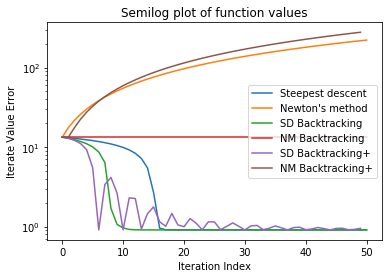

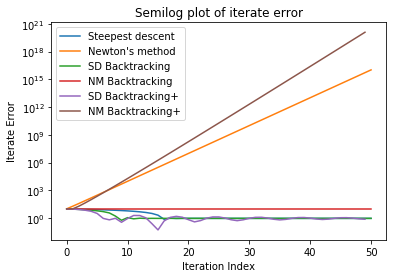

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,log,pow
import math
'''
f = lambda x: np.exp(x)/x # minimum value is 0 at x=0
df = lambda x: np.exp(x)*(x-1)/x**2
d2f = lambda x: np.exp(x)*(x**2-2*x+2)/x**3
'''
'''
f=lambda x: np.log(x**2+1)+np.log((x-1)**2+1)+np.log((x-3/2)**2+1)
df =lambda x: 2*x/(x**2+1)+2*(x-1)/((x-1)**2+1)+2*(x-3/2)/((x-3/2)**2+1)
d2f = lambda x: 2*(1/(x**2+1)-2*x**2/(x**2+1)**2-2*(x-3/2)**2/((x-3/2)**2+1)**2-2*(x-1)**2/((x-1)**2+1)**2+1/((x-3/2)**2+1)+1/((x-1)**2+1))
'''
'''
f=lambda x: -1/(x**2+1)-1/((x-1)**2+1)-1/((x-3/2)**2+1)
df = lambda x: 2*(x/(x**2+1)**2+(x-3/2)/((x-3/2)**2+1)**2+(x-1)/((x-1)**2+1)**2)
d2f=lambda x: 2*(1/(1+x**2)**2-4*x**2/(1+x**2)**3-4*(x-3/2)**2/((x-3/2)**2+1)**3+1/((x-3/2)**2+1)**2+1/(1+(-1+x)**2)**2-4*(x-1)**2/(1+(x-1)**2)**3)
'''

x_sd = [x0]
f_sd = [f(x0)]
x = x0

#delta for SD
for i in range(iter):
    x = x - df(x)/2 # Using the constant stepsize 2 > 1
    x_sd.append(x)
    f_sd.append(f(x))
    
x_nm = [x0]
f_nm = [f(x0)]
x = x0
#delta for NM
for i in range(iter):
    x = x - df(x)/d2f(x) # Using the constant stepsize 2 > 1
    x_nm.append(x)
    f_nm.append(f(x))
    
# Compare convergence of function values with semilog plot
sd, =plt.semilogy(np.abs(f_sd), label='Steepest descent')
nm, =plt.semilogy(np.abs(f_nm), label='Newton\'s method')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd, nm])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd, =plt.semilogy(np.abs(x_sd), label='Steepest descent')
nm, =plt.semilogy(np.abs(x_nm), label='Newton\'s method')
plt.ylabel('Iterate Error')
plt.xlabel('Iteration Index')
plt.legend(handles=[sd, nm])
plt.title('Semilog plot of iterate error')
plt.show()

#comparison with backtracking and accelerated backtracking

x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
#sd+back
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))

x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
#NM+back
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))
    
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
#SD+accBAck
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
#NM+accBack
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot
sd, =plt.semilogy(np.abs(f_sd), label='Steepest descent')
nm, =plt.semilogy(np.abs(f_nm), label='Newton\'s method')
sd_bt, = plt.semilogy(np.abs(f_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(f_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(f_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(f_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd, nm, sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd, =plt.semilogy(np.abs(x_sd), label='Steepest descent')
nm, =plt.semilogy(np.abs(x_nm), label='Newton\'s method')
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd, nm, sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()